<a href="https://colab.research.google.com/github/lukehinsy/GeospatialPractice/blob/main/Location_Data_and_OpenStreetMap_API_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initial Setup

import numpy as np
import pandas as pd
from collections import Counter
from IPython.display import Audio, display
from numpy import linalg

def dfSummary(df):
    print('Note: This command is NOT very performant, and can take quite long on large dataframes!')
    output = []
    for col in df.columns:
        nonNull = len(df) - np.sum(pd.isna(df[col]))
        unique = df[col].nunique()
        colType = str(df[col].dtype)
        output.append([col, nonNull, unique, colType])
    output = pd.DataFrame(output)
    output.columns = ['colName', 'non-null values', 'unique values', 'dtype']
    with pd.option_context('display.max_rows', None): display(output)
        
def propCounter(vec, num = 25, cumul = False):
    l = vec
    c = Counter(l)
    output = [(i, count, c[i] / len(l) * 100.0) for i, count in c.most_common(num)]
    output = pd.DataFrame(output, columns = ['Value', 'Count', 'Percent'])
    if cumul == True:
        output['CumulativePercent'] = output['Percent'].cumsum()
    return output.style.hide_index()

def allDone():
    display(Audio(url = 'https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay = True))

<BR>  
<BR>  
<BR>  
<BR>  
---  
<BR>  
# OSMnx is a package to download open-source data from Open Street Maps.  
<BR>  
<BR>  
<BR>  
---  

In [ ]:
!pip install osmnx
import osmnx as ox
import geopandas as gpd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 3.0 MB/s 
     |████████████████████████████████| 11.2 MB 33.6 MB/s 
     |████████████████████████████████| 1.0 MB 61.4 MB/s 
     |████████████████████████████████| 1.0 MB 60.1 MB/s 
     |████████████████████████████████| 6.3 MB 37.7 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 16.7 MB 445 kB/s 
     |████████████████████████████████| 965 kB 48.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


# Just try outline of a city/place

In [ ]:
place_name = "franklin county, OH, USA"

In [ ]:

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

In [ ]:
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-83.26073 40.00295, -83.26061 40.002...",40.1428,39.794913,-82.761814,-83.260726,298096434,relation,177915,40.028316,-83.007666,"Franklin County, Ohio, United States",boundary,administrative,0.828235


In [ ]:
# Colab doesn't like matplotlib 3.5.3, so roll back to 3.1.3
# get "cannot import name '_png' from 'matplotlib'" error
# Note, no need to restart instance, at least in the commands I've used for this mock-up.
!pip install matplotlib==3.1.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.


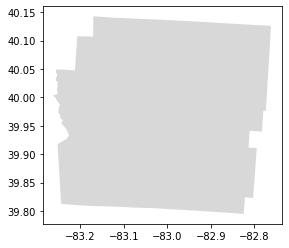

In [ ]:
area.plot(color='grey', alpha=.3)


### Grab ALL buildings in Franklin County

In [ ]:
# List key-value pairs for tags
tags = {'building': True}   

buildings = ox.geometries_from_place(place_name, tags)
buildings.head()

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


barrier                    geometry amenity parking  \
element_type osmid                                                            
node         962857390      NaN  POINT (-83.03514 39.99763)     NaN     NaN   
             9105517668     NaN  POINT (-82.87965 40.02166)    cafe     NaN   
             9645541288     NaN  POINT (-83.00600 40.00099)     NaN     NaN   
             9995557943     NaN  POINT (-82.95027 40.10938)     NaN     NaN   
             9995571633     NaN  POINT (-82.95014 40.10937)     NaN     NaN   

                        entrance  ele gnis:county_id gnis:created  \
element_type osmid                                                  
node         962857390       NaN  NaN            NaN          NaN   
             9105517668      NaN  NaN            NaN          NaN   
             9645541288      NaN  NaN            NaN          NaN   
             9995557943      NaN  NaN            NaN          NaN   
             9995571633      NaN  NaN            NaN          NaN   

                        gnis:feature_id gnis:state_id  ... monastery:type  \
element_type osmid                                     ...                  
node         962857390              NaN           NaN  ...            NaN   
             9105517668             NaN           NaN  ...            NaN   
             9645541288             NaN           NaN  ...            NaN   
             9995557943             NaN           NaN  ...            NaN   
             9995571633             NaN           NaN  ...            NaN   

                        polling_station healthcare:speciailty ways type  \
element_type osmid                                                        
node         962857390              NaN                   NaN  NaN  NaN   
             9105517668             NaN                   NaN  NaN  NaN   
             9645541288             NaN                   NaN  NaN  NaN   
             9995557943             NaN                   NaN  NaN  NaN   
             9995571633             NaN                   NaN  NaN  NaN   

                        is_in:city fuel:biodiesel fuel:biogas  \
element_type osmid                                              
node         962857390         NaN            NaN         NaN   
             9105517668        NaN            NaN         NaN   
             9645541288        NaN            NaN         NaN   
             9995557943        NaN            NaN         NaN   
             9995571633        NaN            NaN         NaN   

                        fuel:electricity theatre:type  
element_type osmid                                     
node         962857390               NaN          NaN  
             9105517668              NaN          NaN  
             9645541288              NaN          NaN  
             9995557943              NaN          NaN  
             9995571633              NaN          NaN  

[5 rows x 308 columns]

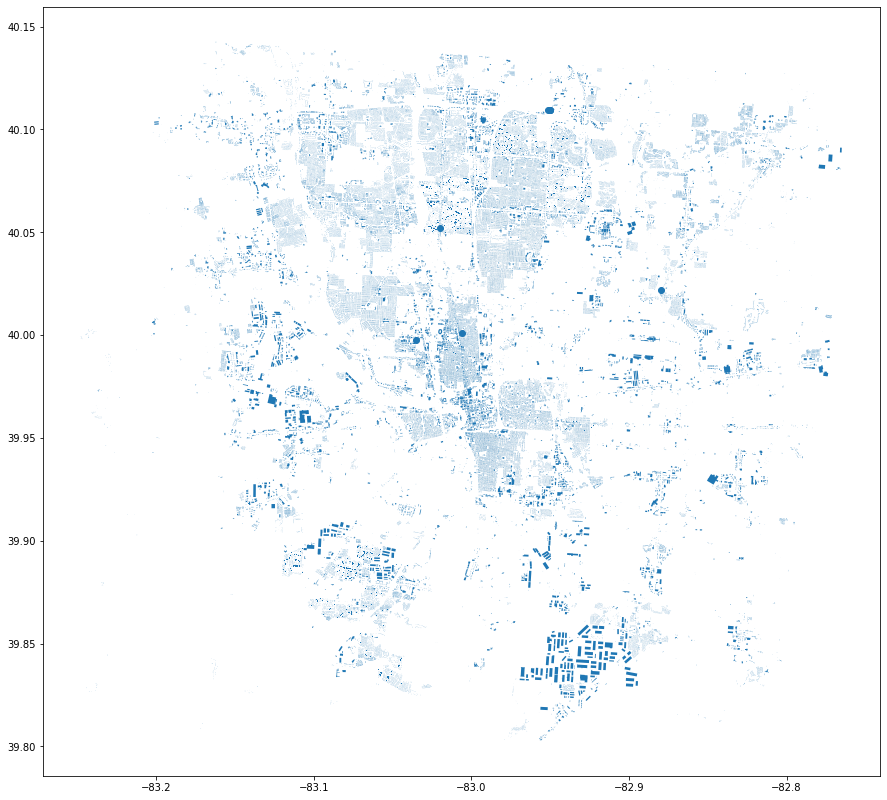

In [ ]:

buildings.plot(figsize=(15,15))


## Grab roads in Franklin County

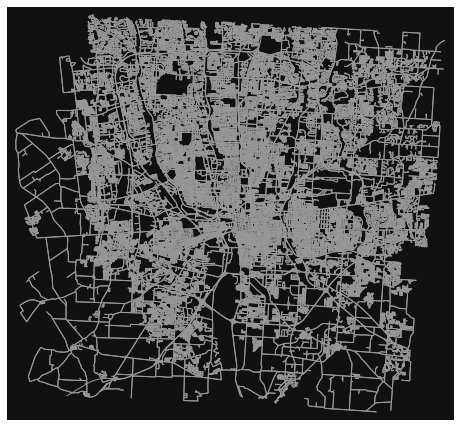

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2344f81050>)

In [ ]:
G = ox.graph_from_place('Dublin, Ohio', network_type='drive')
ox.plot_graph(G,node_size=0)

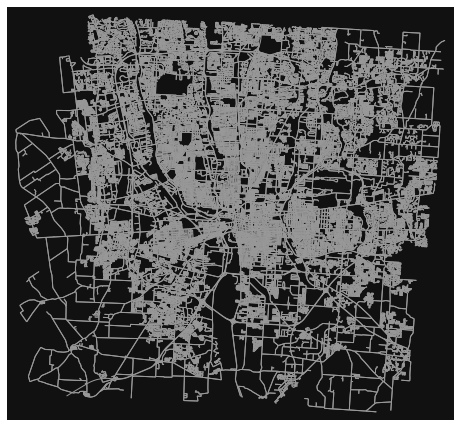

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f34687cfad0>)

In [ ]:
G = ox.graph_from_place('Franklin county, Ohio', network_type='drive')
ox.plot_graph(G,node_size=0)

## OSM locations
a pinpoint location is a "node". A path/shape that's 2-dimensional will be a "way"

any given node or way can be mapped to many key-value pair "tags"

## OSM Tags
tags are key-value pairs. It's a UNION, not intersection so all results match AT LEAST one, not ALL values.  


https://taginfo.openstreetmap.org/keys 

In [ ]:

place_name = "Franklin county, Ohio" 
tags = {'shop': 'supermarket', 'healthcare':['pharmacy','hospital']}
samp = ox.geometries_from_place(place_name, tags)
samp.head()

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


geometry               brand  \
element_type osmid                                                       
node         506867784  POINT (-83.05252 40.00665)  Whole Foods Market   
             519619659  POINT (-83.03530 40.12519)                 NaN   
             612013914  POINT (-83.16429 40.10297)              Kroger   
             612014010  POINT (-83.15594 40.10279)         Giant Eagle   
             612014798  POINT (-83.16426 40.10270)                 NaN   

                       brand:wikidata        brand:wikipedia  \
element_type osmid                                             
node         506867784       Q1809448  en:Whole Foods Market   
             519619659            NaN                    NaN   
             612013914        Q153417              en:Kroger   
             612014010       Q1522721         en:Giant Eagle   
             612014798            NaN                    NaN   

                                      name         shop   amenity healthcare  \
element_type osmid                                                             
node         506867784  Whole Foods Market  supermarket       NaN        NaN   
             519619659    The Hills Market  supermarket       NaN        NaN   
             612013914              Kroger  supermarket       NaN        NaN   
             612014010         Giant Eagle  supermarket       NaN        NaN   
             612014798     Kroger Pharmacy          NaN  pharmacy   pharmacy   

                       short_name addr:city  ... payment:visa smoking  \
element_type osmid                           ...                        
node         506867784        NaN       NaN  ...          NaN     NaN   
             519619659        NaN       NaN  ...          NaN     NaN   
             612013914        NaN       NaN  ...          NaN     NaN   
             612014010        NaN       NaN  ...          NaN     NaN   
             612014798        NaN       NaN  ...          NaN     NaN   

                       delivery:covid19 brand:en brand:es name:es  \
element_type osmid                                                  
node         506867784              NaN      NaN      NaN     NaN   
             519619659              NaN      NaN      NaN     NaN   
             612013914              NaN      NaN      NaN     NaN   
             612014010              NaN      NaN      NaN     NaN   
             612014798              NaN      NaN      NaN     NaN   

                       internet_access:fee payment:visa_debit ways type  
element_type osmid                                                       
node         506867784                 NaN                NaN  NaN  NaN  
             519619659                 NaN                NaN  NaN  NaN  
             612013914                 NaN                NaN  NaN  NaN  
             612014010                 NaN                NaN  NaN  NaN  
             612014798                 NaN                NaN  NaN  NaN  

[5 rows x 76 columns]

In [ ]:
samp.loc[samp.geometry.geometry.type=='Point']

geometry               brand  \
element_type osmid                                                        
node         506867784   POINT (-83.05252 40.00665)  Whole Foods Market   
             519619659   POINT (-83.03530 40.12519)                 NaN   
             612013914   POINT (-83.16429 40.10297)              Kroger   
             612014010   POINT (-83.15594 40.10279)         Giant Eagle   
             612014798   POINT (-83.16426 40.10270)                 NaN   
...                                             ...                 ...   
             9736176539  POINT (-83.06993 40.05443)        CVS Pharmacy   
             9738844026  POINT (-83.11727 40.03263)        CVS Pharmacy   
             9747646946  POINT (-83.13969 40.00244)        CVS Pharmacy   
             9750308317  POINT (-83.12988 39.95148)        CVS Pharmacy   
             9872571739  POINT (-83.09419 40.06443)        CVS Pharmacy   

                        brand:wikidata        brand:wikipedia  \
element_type osmid                                              
node         506867784        Q1809448  en:Whole Foods Market   
             519619659             NaN                    NaN   
             612013914         Q153417              en:Kroger   
             612014010        Q1522721         en:Giant Eagle   
             612014798             NaN                    NaN   
...                                ...                    ...   
             9736176539       Q2078880                    NaN   
             9738844026       Q2078880                    NaN   
             9747646946       Q2078880                    NaN   
             9750308317       Q2078880                    NaN   
             9872571739       Q2078880                    NaN   

                                       name         shop   amenity healthcare  \
element_type osmid                                                              
node         506867784   Whole Foods Market  supermarket       NaN        NaN   
             519619659     The Hills Market  supermarket       NaN        NaN   
             612013914               Kroger  supermarket       NaN        NaN   
             612014010          Giant Eagle  supermarket       NaN        NaN   
             612014798      Kroger Pharmacy          NaN  pharmacy   pharmacy   
...                                     ...          ...       ...        ...   
             9736176539        CVS Pharmacy          NaN  pharmacy   pharmacy   
             9738844026        CVS Pharmacy          NaN  pharmacy   pharmacy   
             9747646946        CVS Pharmacy          NaN  pharmacy   pharmacy   
             9750308317        CVS Pharmacy          NaN  pharmacy   pharmacy   
             9872571739        CVS Pharmacy          NaN  pharmacy   pharmacy   

                        short_name        addr:city  ... payment:visa smoking  \
element_type osmid                                   ...                        
node         506867784         NaN              NaN  ...          NaN     NaN   
             519619659         NaN              NaN  ...          NaN     NaN   
             612013914         NaN              NaN  ...          NaN     NaN   
             612014010         NaN              NaN  ...          NaN     NaN   
             612014798         NaN              NaN  ...          NaN     NaN   
...                            ...              ...  ...          ...     ...   
             9736176539        CVS  Upper Arlington  ...          NaN     NaN   
             9738844026        CVS         Hilliard  ...          NaN     NaN   
             9747646946        CVS         Hilliard  ...          NaN     NaN   
             9750308317        CVS         Columbus  ...          NaN     NaN   
             9872571739        CVS              NaN  ...          NaN     NaN   

                        delivery:covid19 brand:en brand:es name:es  \
element_type osmid                         

In [ ]:
# Look at top frequency location names
propCounter(samp.name)

Value,Count,Percent
CVS Pharmacy,45,17.786561
Kroger,37,14.624506
Walgreens,17,6.719368
Giant Eagle,12,4.743083
ALDI,12,4.743083
Save-A-Lot,11,4.347826
Walmart Supercenter,10,3.952569
Kroger Pharmacy,7,2.766798
Walmart Pharmacy,6,2.371542
Meijer,5,1.976285


In [ ]:

import matplotlib.pyplot as plt
county = area.geometry.geometry
amenities = samp.loc[samp.geometry.geometry.type=='Point']['geometry']


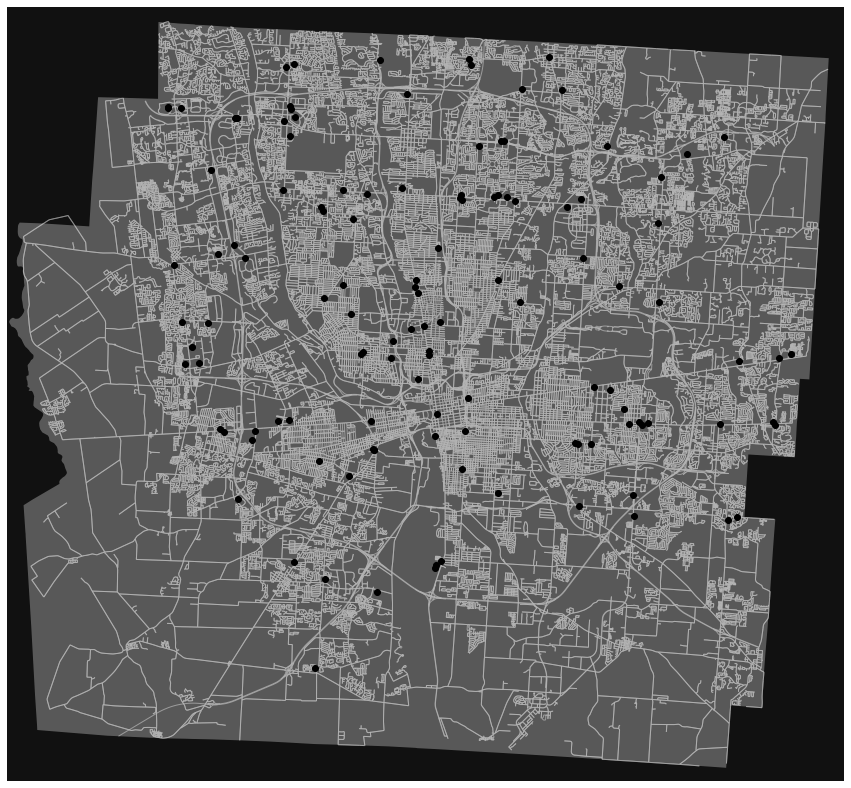

In [ ]:


fig, ax = ox.plot_graph(G, show=False, close=False, node_size=0, figsize=(15,15,), edge_alpha=.7)

county.plot(ax=ax, color='white', alpha=.3,)
amenities.plot(ax=ax,color='black')
plt.show()



# Okay, let's try tesselating this into a hex grid. 

<BR>
<BR>
<br>  

# Below this section is from exploring GOOGLE PLACES API, but that has strict limits and usage rules forbidding caching results
This means you cannot functionally or legally use it to create your own dataset.   
 <BR>
<BR>  
<BR>        
<BR>  
<BR>  
<BR>  
<BR>  
<BR>  
<BR>  

---



---



In [ ]:
<>B#@title  Query
input = 'Museum of Art Australia' #@param {type:"string"}
inputFix=input.replace(" ","%20")

In [ ]:
print(input)
print(inputFix)

Museum of Art Australia
Museum%20of%20Art%20Australia
